Model Evaluation Results
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


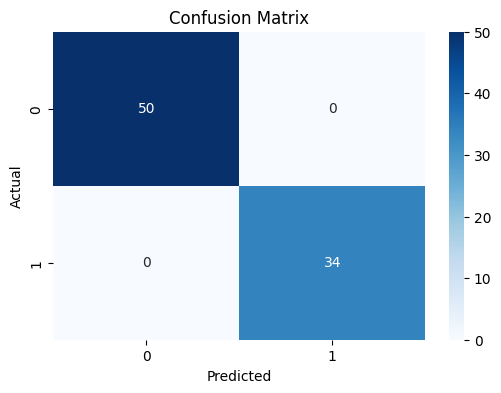


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [4]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = pd.read_csv("Titanic Dataset.csv")

# Select columns(selected the column which i needed) 
titanic = titanic[["Survived", "Pclass", "Sex", "Age", "Fare"]].copy()

# Handle missing values
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
titanic["Fare"] = titanic["Fare"].fillna(titanic["Fare"].median())

# Convert categorical to numeric
titanic["Sex"] = titanic["Sex"].map({"male": 0, "female": 1})

# Drop any remaining missing values (for checking purpose i did)
titanic = titanic.dropna()

# Split features and target
X = titanic.drop("Survived", axis=1)
y = titanic["Survived"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation of Results
print("Model Evaluation Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
